Question 1:
Determine the Number of Tags Per Question

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

In [13]:
cd "/content/drive/MyDrive/MachineLearning_LHC/Arjun_Assignment_data/dataset"

/content/drive/MyDrive/MachineLearning_LHC/Arjun_Assignment_data/dataset


In [6]:
ls

post_history.csv  postLinks.json  posts_long.json  users.csv
postLinks.csv     posts_long.csv  posts_short.csv


In [7]:
dataset5 = pd.read_csv('posts_short.csv')
dataset5.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,score,view_count,owner_user_id,answer_count,comment_count,favorite_count
count,676204.000000,6.762040e+05,676204.0,6.762040e+05,676204.0,676204.000000,6.762040e+05,6.762040e+05,676204.000000,676204.000000,676204.000000
mean,338101.500000,2.584291e+07,1.0,1.166794e+07,-999.0,14.731906,1.549030e+04,2.891993e+06,2.415215,2.547613,5.042214
std,195203.425051,1.586292e+07,0.0,1.531875e+07,0.0,97.924320,7.056748e+04,2.703980e+06,3.403235,2.914937,44.758421
min,0.000000,4.000000e+00,1.0,-9.990000e+02,-999.0,-146.000000,3.000000e+00,-9.990000e+02,0.000000,0.000000,0.000000
25%,169050.750000,1.170959e+07,1.0,-9.990000e+02,-999.0,0.000000,6.400000e+01,6.399082e+05,1.000000,0.000000,0.000000
50%,338101.500000,2.566376e+07,1.0,2.574750e+06,-999.0,1.000000,4.880000e+02,1.952811e+06,2.000000,2.000000,0.000000
75%,507152.250000,3.999613e+07,1.0,2.095320e+07,-999.0,5.000000,5.694000e+03,4.648680e+06,3.000000,4.000000,1.000000
max,676203.000000,5.213412e+07,1.0,5.213268e+07,-999.0,21775.000000,6.842435e+06,1.030524e+07,518.000000,70.000000,9977.000000


In [9]:
dataset5.head(5)

,Unnamed: 0,id,post_type_id,accepted_answer_id,parent_id,creation_date,score,view_count,owner_user_id,tags,answer_count,comment_count,favorite_count,community_owned_date
0,0,4,1,7,-999,2008-07-31T21:42:52.667,573,37080,8,<c#><floating-point><type-conversion><double><...,13,1,41,2012-10-31T16:42:47.213
1,1,6,1,31,-999,2008-07-31T22:08:08.620,256,16306,9,<html><css><css3><internet-explorer-7>,5,0,10,NaN
2,2,9,1,1404,-999,2008-07-31T23:40:59.743,1743,480476,1,<c#><.net><datetime>,64,7,399,2011-08-16T19:40:43.080
3,3,11,1,1248,-999,2008-07-31T23:55:37.967,1348,136033,1,<c#><datetime><time><datediff><relative-time-s...,35,3,529,2009-09-04T13:15:59.820
4,4,13,1,-999,-999,2008-08-01T00:42:38.903,539,157009,9,<javascript><html><browser><timezone><timezone...,25,6,137,NaN


In [10]:
count_tags_perQuestion = dict()
for i in dataset5['tags']:
    #print(i)
    temp = i.split('>')
    temp.pop() # removing last element which is empty char
    count_tags_perQuestion[len(temp)] = count_tags_perQuestion.get(len(temp),0) + 1
print(count_tags_perQuestion)

{5: 73490, 4: 124127, 3: 194334, 2: 189704, 1: 94523, 6: 26}


In [11]:
x_tagsPerQuestion = list()
y_tagsPerQuestion = list()
for i,j in count_tags_perQuestion.items() :
    x_tagsPerQuestion.append(i)
    y_tagsPerQuestion.append(j)
print(x_tagsPerQuestion)
print(y_tagsPerQuestion)

[5, 4, 3, 2, 1, 6]
[73490, 124127, 194334, 189704, 94523, 26]


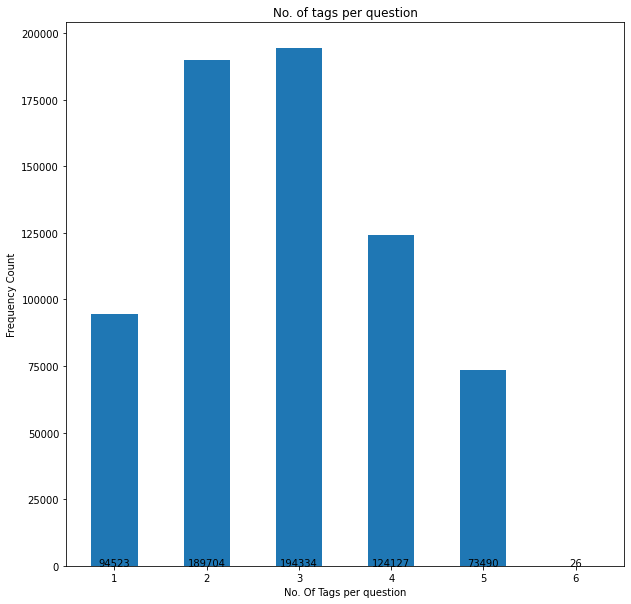

In [12]:
def addlabels(x,y):
    c = 1
    for i,j in zip(x,y):
        plt.text(i, i, j, ha = 'center')
        c+=1
        # setting figure size by using figure() function 
plt.figure(figsize = (10, 10))
plt.bar(x_tagsPerQuestion, y_tagsPerQuestion,0.5)
plt.title('No. of tags per question')
plt.xlabel("No. Of Tags per question")
plt.ylabel("Frequency Count")
addlabels(x_tagsPerQuestion, y_tagsPerQuestion)